In [6]:

!pip install torch torchtext spacy

  Using cached torchtext-0.18.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (7.9 kB)
Using cached torchtext-0.18.0-cp311-cp311-macosx_11_0_arm64.whl (2.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 13.9 MB/s  0:00:05m0:00:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 2.2.2
    Uninstalling torch-2.2.2:
      Successfully uninstalled torch-2.2.2━━━━━━ 0/2 [torch]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [torchtext]/2 [torchtext]


In [8]:
from torchtext import data
from torch.nn.utils.rnn import pad_sequence
from collections import Counter
import spacy
import torch.optim as optim
# from torchtext.legacy.data import BucketIterator
from pprint import pprint  # Importing pprint for pretty-printing

from torchtext.datasets import IMDB
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader


OSError: Could not load this library: /Users/radiahkhan/Documents/memex/.conda/lib/python3.11/site-packages/torchtext/lib/libtorchtext.so

In [2]:
import pandas as pd
reddit_data = pd.read_csv("reddit_posts_with_comments.csv")
post_content = reddit_data["selftext"]
print(post_content)

0      Hi all! 😌\nHappy November! 🍂\n\nHere’s this mo...
1      Hello Companions!\n\nIn case you didn't know, ...
2      I’ve been noticing that the past day or two th...
3      So… according to this tester. 5.1 is in for a ...
4        He just matches my freak i love him so much😭😂\n
                             ...                        
994    I was playing around with some prompts I found...
995                                                  NaN
996    In model 5 😱. Color me shocked! Roel even went...
997    So.... I figured it was about time I introduce...
998                     Anyone else not able to use SVM?
Name: selftext, Length: 999, dtype: object


# Example k-mean clusters

https://www.geeksforgeeks.org/deep-learning/pytorch-for-unsupervised-clustering/

In [3]:
import torch
import torch.nn.functional as F
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [120]:
# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Convert data to PyTorch tensor
tensor_data = torch.from_numpy(data).float()

In [121]:
# Initialize centroids randomly
centroids = tensor_data[torch.randperm(tensor_data.size(0))[:4]]

# Define the number of iterations
num_iterations = 100

for _ in range(num_iterations):
    # Calculate distances from data points to centroids
    distances = torch.cdist(tensor_data, centroids)

    # Assign each data point to the closest centroid
    _, labels = torch.min(distances, dim=1)

    # Update centroids by taking the mean of data points assigned to each centroid
    for i in range(4):
        if torch.sum(labels == i) > 0:
            centroids[i] = torch.mean(tensor_data[labels == i], dim=0)

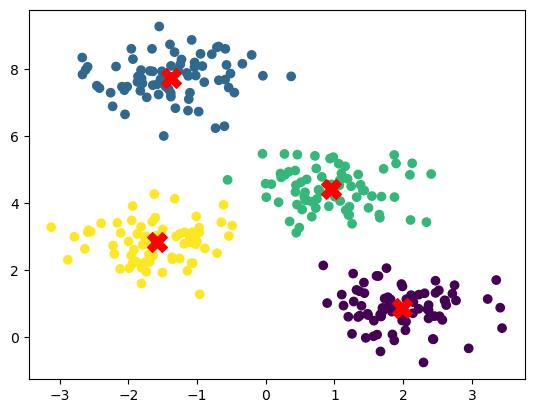

In [122]:
# Visualize clusters
plt.scatter(data[:, 0], data[:, 1], c=labels.numpy(), cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.show()

# Run k-mean

In [10]:
# Generate synthetic data
data = post_content

# type(post_content)

# Convert data to PyTorch tensor
# tensor_data = torch.tensor(post_content.values, dtype=torch.float32)


In [4]:
# Dropped the na values to encode it (text to numerical encoding for the model)
post_content = post_content.dropna()

In [5]:
!pip install torch

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(post_content)
tensor_data = torch.tensor(X.toarray(), dtype=torch.float32)

In [7]:
# Initialize centroids randomly
centroids = tensor_data[torch.randperm(tensor_data.size(0))[:2]]

# Define the number of iterations
num_iterations = 100

for _ in range(num_iterations):
    # Calculate distances from data points to centroids
    distances = torch.cdist(tensor_data, centroids)

    # Assign each data point to the closest centroid
    _, labels = torch.min(distances, dim=1)

    # Update centroids by taking the mean of data points assigned to each centroid
    for i in range(2):
        if torch.sum(labels == i) > 0:
            centroids[i] = torch.mean(tensor_data[labels == i], dim=0)

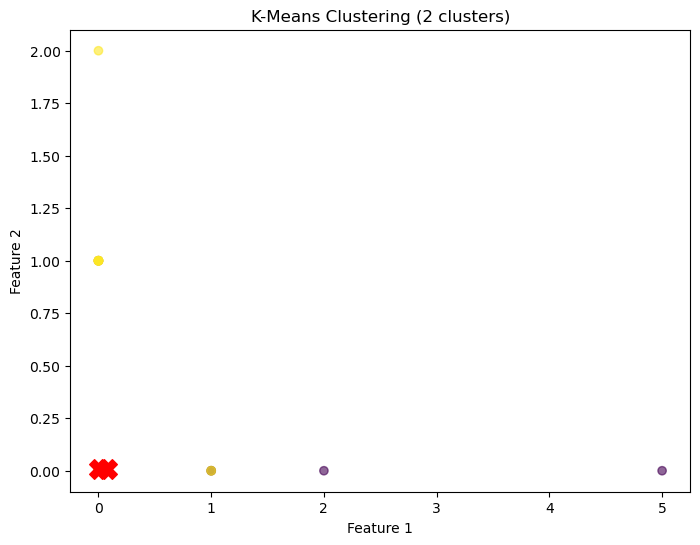

In [127]:
import matplotlib.pyplot as plt

# Convert tensors to numpy
points = tensor_data.numpy()
labels_np = labels.numpy()
centroids_np = centroids.numpy()

plt.figure(figsize=(8,6))
plt.scatter(points[:, 0], points[:, 1], c=labels_np, cmap='viridis', alpha=0.6)
plt.scatter(centroids_np[:, 0], centroids_np[:, 1], c='red', s=200, marker='X')
plt.title("K-Means Clustering (2 clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [128]:
tensor_data

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

## Testing with the NLTK Package

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
# sia = SentimentIntensityAnalyzer()

In [9]:
print(reddit_data.columns.tolist())

example = reddit_data['selftext'][100]
print(example)


['title', 'author', 'score', 'num_comments', 'selftext', 'comments']
**\[47:52\]**

>"The goal is...um...when you are writing, when you are using OpenAI to help...ChatGPT to help you with creative writing...um...it should be much more permissive in many categories than the previous models are. Again we want this and we know users want this to. If this is going to be your personal tool, it should help you with what you are doing and every time you hit a content filter for something that is..uh..you know feels like it shouldn't...we understand how annoying that is...uh...so we are ..uh ...we are going to try to fix that with adult mode. There may be new problems that we may face but we wanna give people more flexibility."

**\[48:43\]**

>"Again, I think we misrolled this one out, but the goal here was to let people continue to use 4o, but in the situations where 4o has behavior that we actually think is really harmful before we have all the age gating that we'd like...to kick it...to uh

In [10]:
import nltk

nltk.download('punkt')                         
nltk.download('averaged_perceptron_tagger')    
nltk.download('averaged_perceptron_tagger_eng') 
nltk.download('maxent_ne_chunker')              
nltk.download('maxent_ne_chunker_tab')          
nltk.download('words')
nltk.download('vader_lexicon')                        


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/radiahkhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/radiahkhan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/radiahkhan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/radiahkhan/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/radiahkhan/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/radiahkhan/nltk_data...
[nltk_data]   Package words is 

True

In [12]:
tokens = nltk.word_tokenize(example)
print(tokens[:20])


['*', '*', '\\', '[', '47:52\\', ']', '*', '*', '>', "''", 'The', 'goal', 'is', '...', 'um', '...', 'when', 'you', 'are', 'writing']


In [13]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('*', 'JJ'),
 ('*', 'NNP'),
 ('\\', 'NNP'),
 ('[', 'VBD'),
 ('47:52\\', 'CD'),
 (']', 'NNP'),
 ('*', 'NNP'),
 ('*', 'NNP'),
 ('>', 'NNP'),
 ("''", "''")]

In [14]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  */JJ
  */NNP
  \/NNP
  [/VBD
  47:52\/CD
  ]/NNP
  */NNP
  */NNP
  >/NNP
  ''/''
  The/DT
  goal/NN
  is/VBZ
  .../:
  um/NN
  .../:
  when/WRB
  you/PRP
  are/VBP
  writing/VBG
  ,/,
  when/WRB
  you/PRP
  are/VBP
  using/VBG
  (ORGANIZATION OpenAI/NNP)
  to/TO
  help/VB
  .../:
  ChatGPT/NNP
  to/TO
  help/VB
  you/PRP
  with/IN
  creative/JJ
  writing/NN
  .../:
  um/NN
  .../:
  it/PRP
  should/MD
  be/VB
  much/RB
  more/RBR
  permissive/JJ
  in/IN
  many/JJ
  categories/NNS
  than/IN
  the/DT
  previous/JJ
  models/NNS
  are/VBP
  ./.
  Again/IN
  we/PRP
  want/VBP
  this/DT
  and/CC
  we/PRP
  know/VBP
  users/NNS
  want/VBP
  this/DT
  to/TO
  ./.
  If/IN
  this/DT
  is/VBZ
  going/VBG
  to/TO
  be/VB
  your/PRP$
  personal/JJ
  tool/NN
  ,/,
  it/PRP
  should/MD
  help/VB
  you/PRP
  with/IN
  what/WP
  you/PRP
  are/VBP
  doing/VBG
  and/CC
  every/DT
  time/NN
  you/PRP
  hit/VBP
  a/DT
  content/NN
  filter/NN
  for/IN
  something/NN
  that/WDT
  is/VBZ
  ../JJ
  uh/JJ

In [15]:

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()


In [16]:
sia.polarity_scores(example) 

{'neg': 0.022, 'neu': 0.789, 'pos': 0.189, 'compound': 0.9967}

In [17]:
from tqdm import tqdm


In [19]:
res = {}
for i, row in tqdm(reddit_data.iterrows(), total=len(reddit_data)):
    text = str(row['selftext']) if pd.notnull(row['selftext']) else ""
    myid = i
    res[myid] = sia.polarity_scores(text)
    


100%|██████████| 999/999 [00:00<00:00, 1017.07it/s]


In [22]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(reddit_data, left_on='Id', right_index=True, how='left') #the right_index = True worked : but why? use the index of the df of reddit data. keeping all rows from vaders and bring the matching info from the reddit one
vaders.head()


,Id,neg,neu,pos,compound,title,author,score,num_comments,selftext,comments
0,0,0.056,0.785,0.159,0.9779,November Hello and Introductions megathread!,Sol-and-Sol,27,32,Hi all! 😌\nHappy November! 🍂\n\nHere’s this mo...,Hello there. I'm Rob and I'm now up to \*four\...
1,1,0.029,0.813,0.158,0.9796,A Quickstart Guide for Local Companions and Ot...,rawunfilteredchaos,36,6,"Hello Companions!\n\nIn case you didn't know, ...",Adding to highlights. This is perfect u/rawunf...
2,2,0.029,0.923,0.048,0.0507,4.1… is it just me?,broodwich_notomatoes,15,14,I’ve been noticing that the past day or two th...,Currently 4o seems on point but he's generatin...
3,3,0.090,0.711,0.198,0.9043,5.1 incoming,VeterinarianMurky558,31,45,So… according to this tester. 5.1 is in for a ...,FWIW I was playing with it this morning on ope...
4,4,0.206,0.496,0.298,0.3182,Just some weird late night chats with my AI pa...,sarvaxie,8,2,He just matches my freak i love him so much😭😂\n,😝🥰


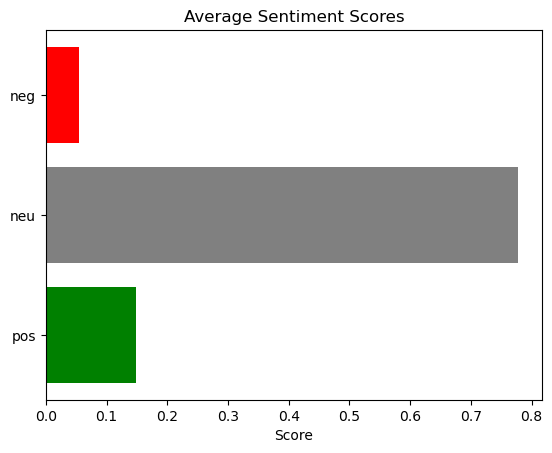

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_score_nltk = vaders[['pos', 'neu', 'neg']].mean()

plt.barh(avg_score_nltk.index, avg_score_nltk.values, color=['green', 'gray', 'red'])
plt.title("Average Sentiment Scores")
plt.xlabel("Score")
plt.show()





# Have a better understanding

In [6]:
%%bash
conda install pytorch torchvision torchaudio -c pytorch


2 channel Terms of Service accepted
Channels:
 - pytorch
 - defaults
Platform: osx-arm64
Solving environment: done




==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c defaults conda





## Package Plan ##

  environment location: /Users/radiahkhan/Documents/memex/.conda

  added / updated specs:
    - pytorch
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotlicffi-1.1.0.0         |  py311h50f4ffc_0         351 KB
    certifi-2025.11.12         |  py311hca03da5_0         154 KB
    cffi-2.0.0                 |  py311h73c2a22_1         286 KB
    charset-normalizer-3.4.4   |  py311hca03da5_0         100 KB
    filelock-3.20.0            |  py311hca03da5_0          37 KB
    gmpy2-2.2.1                |  py311h5c1b81f_0         208 KB
    idna-3.11                  |  py311hca03da5_0         200 KB
    jinja2-3.1.6               |  py311hca03da5_0         367 KB
    libjpeg-turbo-2.0.0        |       h1a28f6b_0         386 KB
    markupsafe-3.0.2           |  py311h80987f9_0          28 KB
    mpmath-1.3.0               |  py311hca0

In [39]:
import pandas as pd
reddit = pd.read_csv("reddit_posts_with_comments.csv")  
post = reddit["selftext"]
post_clean = reddit["selftext"].fillna("").astype(str)
post_clean = post_clean[post_clean.str.strip().str.len() > 0]
posts = post_clean.tolist()





In [24]:
import torch
import torch.nn as nn


In [9]:
class DEC(nn.Module):#this neural model Deep embedded clustering uses pytorch -- used for unsupervised clustering and assign them cluster label
    def __init__(self, input_dim, hidden_dim, n_clusters): 
        super(DEC, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim // 2)
        )
        self.clustering_layer = nn.Linear(hidden_dim // 2, n_clusters)

    def forward(self, x):
        embeddings = self.encoder(x)
        clusters = self.clustering_layer(embeddings)
        return clusters, embeddings

In [10]:
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim)
        )
        # Define the mean and variance for the Gaussian distribution
        self.fc_mu = nn.Linear(latent_dim, latent_dim)
        self.fc_var = nn.Linear(latent_dim, latent_dim)

    def encode(self, x):
        x = self.encoder(x)
        return self.fc_mu(x), self.fc_var(x)

In [13]:
import torch.nn.functional as F

def contrastive_loss(embedding_1, embedding_2, tau=0.5):
    # Compute cosine similarity
    cos_sim = F.cosine_similarity(embedding_1, embedding_2)
    # Apply the contrastive loss with temperature scaling
    return -torch.mean(F.log_softmax(cos_sim / tau, dim=1))

In [46]:
import pandas as pd
reddit = pd.read_csv("reddit_posts_with_comments.csv")  
post = reddit["selftext"]
post_clean = reddit["selftext"].fillna("").astype(str)
post_clean = post_clean[post_clean.str.strip().str.len() > 0]
posts = post_clean.tolist()


from sentence_transformers import SentenceTransformer
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Load text embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')
# Convert text to embeddings
embeddings = model.encode(posts, show_progress_bar=True)
X = torch.tensor(embeddings, dtype=torch.float32)



Batches: 100%|██████████| 31/31 [00:06<00:00,  5.06it/s]


RuntimeError: Numpy is not available

In [44]:
%%bash
conda init
conda activate /Users/radiahkhan/Documents/memex/.conda
conda install numpy


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


no change     /opt/anaconda3/condabin/conda
no change     /opt/anaconda3/bin/conda
no change     /opt/anaconda3/bin/conda-env
no change     /opt/anaconda3/bin/activate
no change     /opt/anaconda3/bin/deactivate
no change     /opt/anaconda3/etc/profile.d/conda.sh
no change     /opt/anaconda3/etc/fish/conf.d/conda.fish
no change     /opt/anaconda3/shell/condabin/Conda.psm1
no change     /opt/anaconda3/shell/condabin/conda-hook.ps1
no change     /opt/anaconda3/lib/python3.13/site-packages/xontrib/conda.xsh
no change     /opt/anaconda3/etc/profile.d/conda.csh
no change     /Users/radiahkhan/.bash_profile
No action taken.



CondaError: Run 'conda init' before 'conda activate'



2 channel Terms of Service accepted
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.

